In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns 
import os 
from datetime import datetime 

import warnings 
warnings.filterwarnings("ignore") 


In [2]:
data = pd.read_csv('all_stocks_5yr.csv') 
print(data.shape) 
print(data.sample(7)) 

(619040, 7)
              date    open      high      low   close   volume  Name
516255  2014-12-31  186.19  187.1000  182.100  182.11  1110630   SPG
544235  2017-08-04   38.00   39.7799   37.860   39.51  3876744  TRIP
469728  2015-12-03   92.29   92.4700   82.805   83.02  4705562   PVH
459745  2016-04-13   53.69   55.0800   53.530   55.02  1191800   PNR
334057  2015-02-25   70.00   71.4325   69.630   70.90  4372886   KSS
68488   2015-09-15   75.46   76.7500   75.230   76.50  5473687   AXP
494349  2018-01-02   17.66   18.0600   17.370   17.92  8548538   RRC


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
data['date'] = pd.to_datetime(data['date']) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


## Exploratory Data Analysis

In [12]:
# Select a few unique company names to plot
unique_companies = data['Name'].unique()[:9]  

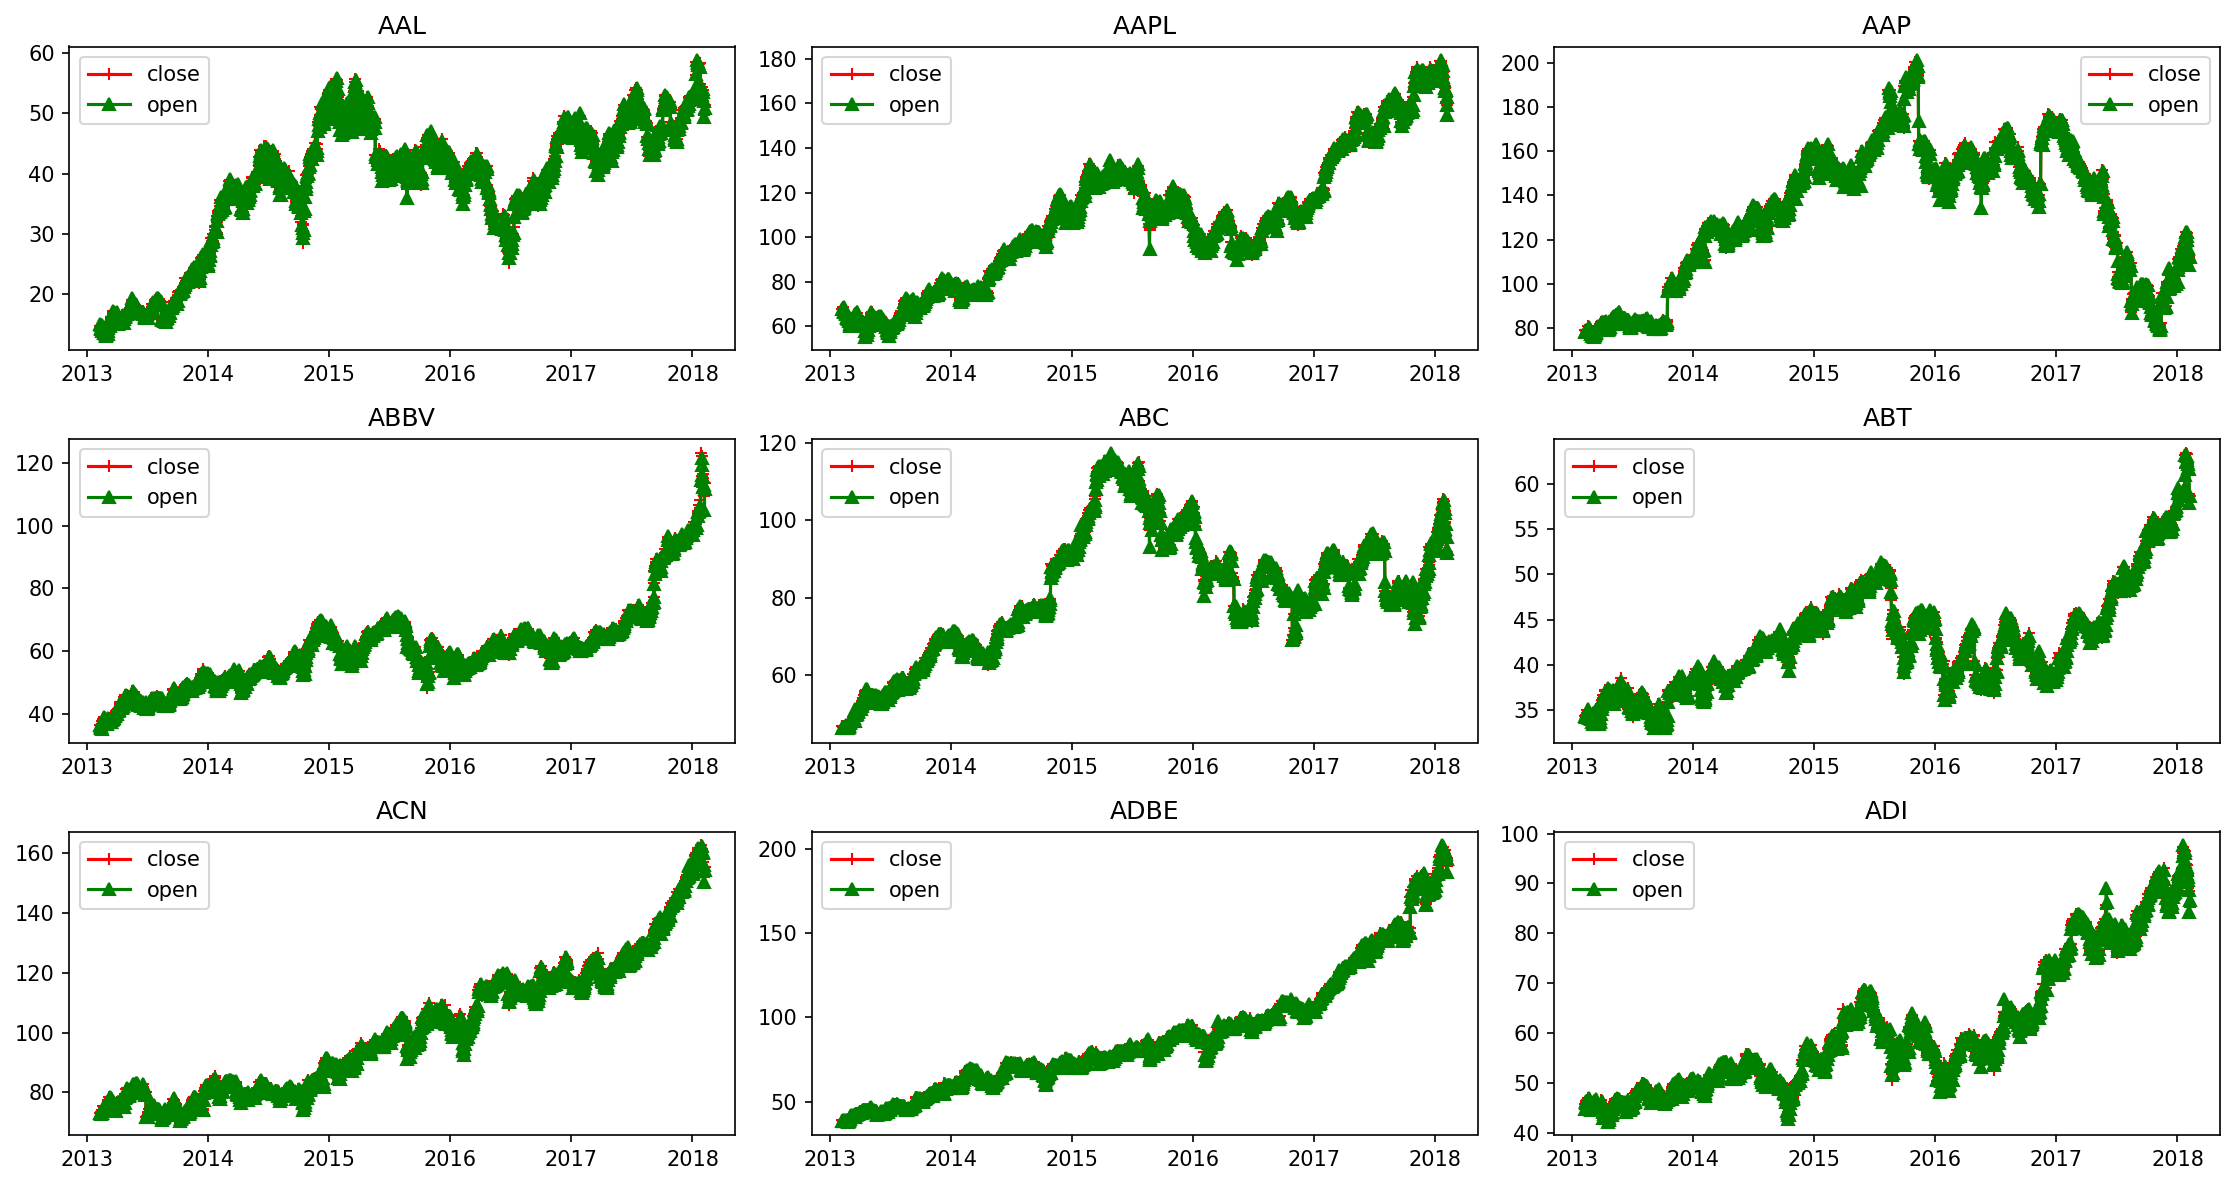

In [14]:
# Plotting
plt.figure(figsize=(15, 8), dpi=150) 
for index, company in enumerate(unique_companies, 1):
    plt.subplot(3, 3, index)
    company_data = data[data['Name'] == company]
    plt.plot(company_data['date'], company_data['close'], color="red", label="close", marker="+")
    plt.plot(company_data['date'], company_data['open'], color="green", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()
plt.show()

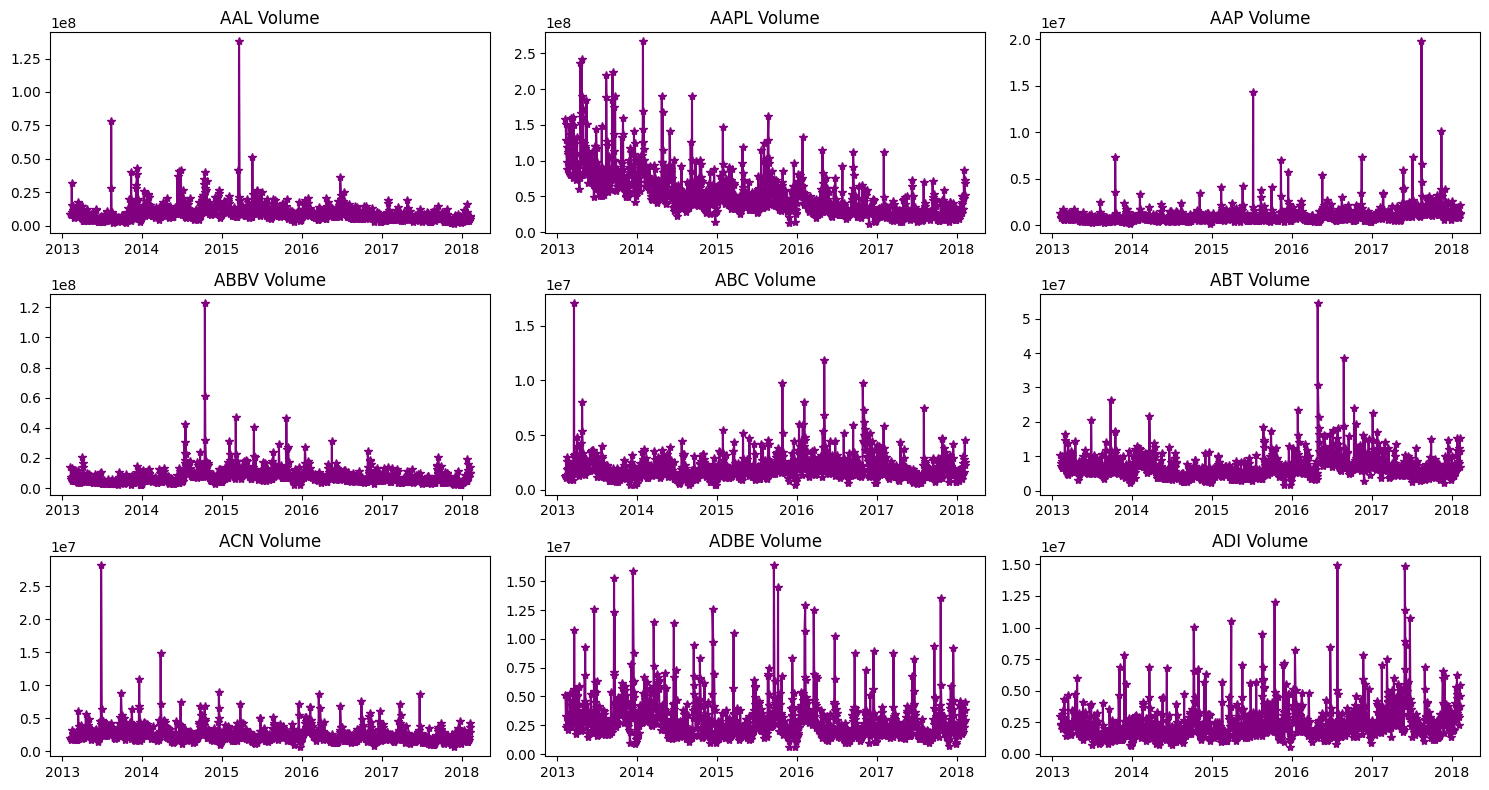

In [17]:
# Setup figure
plt.figure(figsize=(15, 8))

# Loop through each company and plot
for index, company in enumerate(unique_companies, start=1):
    plt.subplot(3, 3, index)
    company_data = data[data['Name'] == company]
    plt.plot(company_data['date'], company_data['volume'], color='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()

plt.show()

## Considering Apple as example 

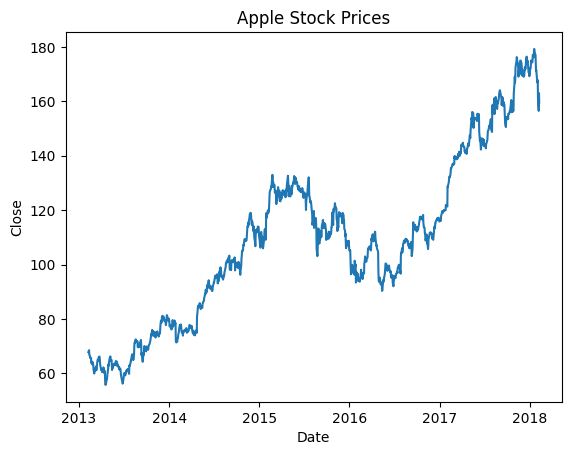

In [19]:
apple = data[data['Name'] == 'AAPL'] 
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1)) 
& (apple['date']<datetime(2018,1,1))] 
plt.plot(apple['date'],apple['close']) 
plt.xlabel("Date") 
plt.ylabel("Close") 
plt.title("Apple Stock Prices") 
plt.show()

In [20]:
close_data = apple.filter(['close']) 
dataset = close_data.values 
training = int(np.ceil(len(dataset) * .95)) 
print(training) 

1197


In [21]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset) 

train_data = scaled_data[0:int(training), :] 
# prepare feature and labels 
x_train = [] 
y_train = [] 

for i in range(60, len(train_data)): 
	x_train.append(train_data[i-60:i, 0]) 
	y_train.append(train_data[i, 0]) 

x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 


In [24]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

model.summary() # To print the model summary

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error') 
history = model.fit(x_train, y_train, epochs=20) 


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0701
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0112
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0091
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0084
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0069
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0085
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0078
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0069
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0069
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0073
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0059
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0050
Epoch 13/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0055
Epoch 14/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0053
Epoch 15/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0057
Epoc

In [26]:
test_data = scaled_data[training - 60:, :] 
x_test = [] 
y_test = dataset[training:, :] 
for i in range(60, len(test_data)): 
	x_test.append(test_data[i-60:i, 0]) 

x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

# predict the testing data 
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 

# evaluation metrics 
mse = np.mean(((predictions - y_test) ** 2)) 
print("MSE", mse) 
print("RMSE", np.sqrt(mse)) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
MSE 37.05824907757769
RMSE 6.08754869200877


In [28]:
print(apple.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


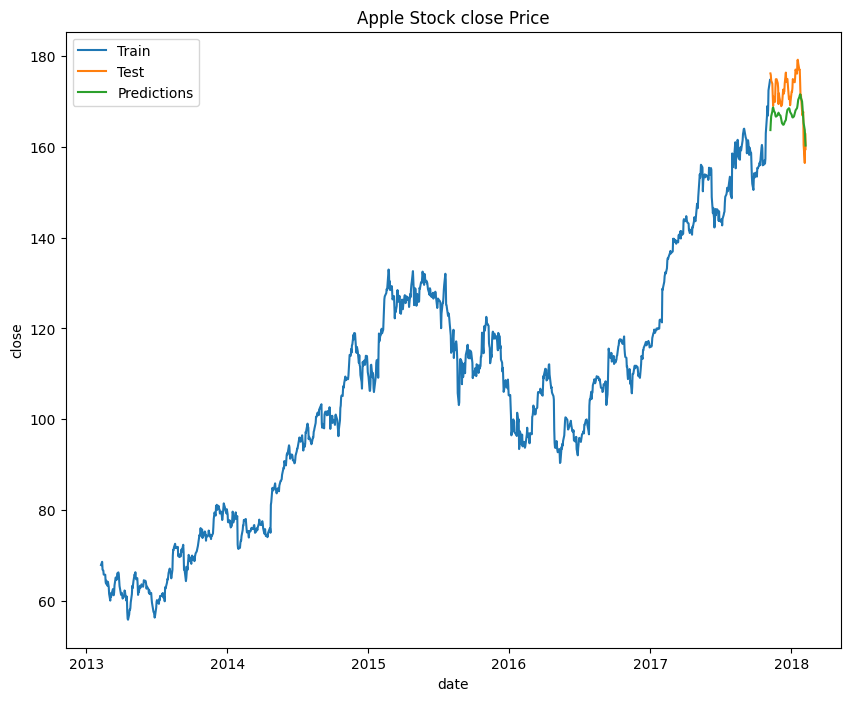

In [30]:
train = apple[:training] 
test = apple[training:] 
test['Predictions'] = predictions 

plt.figure(figsize=(10, 8)) 
plt.plot(train['date'], train['close']) 
plt.plot(test['date'], test[['close', 'Predictions']]) 
plt.title('Apple Stock close Price') 
plt.xlabel('date') 
plt.ylabel("close") 
plt.legend(['Train', 'Test', 'Predictions']) 